## Lab 4 - part 2: Data Weights and Autocorellation

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



## Exercise 4a: Spatial Autocorrelation and ESDA 

USE the Liverpool IMD data we have been using in previous sessions. This will require you to:

* Load up the IMD dataset for Liverpool.
* Create a choropleth of the `imd_score` variable.
* Compute the spatial weights matrix for the LSOAs. Think of one criterium to build it that you think would fit this variable (e.g. contiguity, distance-based, etc.), and apply it.
* Create the standardized version of the IMD scores.
* Calculate the spatial lag of the standardized scores.
* Create the Moran Plot.
* Calculate the value of Moran's I as well as its significance level.
* Perform a LISA analysis and generate a map of the results. What are the main patterns?

In [1]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import pysal as ps
from pysal.lib import weights
from libpysal.io import open as psopen
import geopandas as gpd
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt
from esda import Moran
from libpysal.weights.distance import DistanceBand
from libpysal.io import open as psopen
from splot.esda import moran_scatterplot


ModuleNotFoundError: No module named 'contextily'

For this part I would like you to experiment with Data from Amstedam. However this will require you to find the dataset yourself!

## Question 1: Building a Contiguity-Based Weight Matrix

Use PySAL to create a contiguity-based weight matrix (W) for a given spatial dataset of polygons. Write a function create_contiguity_weights that:

    Reads in a shapefile of polygons.
    Constructs a Queen contiguity-based spatial weights matrix.
    Returns the weight matrix.


In [2]:
#define path of woningwaarde in 2002 
woningwaarde_shp = 'data/Amsterdam_woningwaarde/WONINGWAARDE_2002_region.shp'
lookup_path = 'data/Amsterdam_woningwaarde'

In [3]:
 # Read the shapefile
woningwaarde_2002= gpd.read_file(woningwaarde_shp)

In [4]:
 # Check and display the column names to help debug

print(f"Available columns: {woningwaarde_2002.columns}")

Available columns: Index(['Lower', 'Upper', 'LABEL', 'SELECTIE', 'FILTER', 'geometry'], dtype='object')


For this part I would like you to experiment with Data from Amstedam. However this will require you to find the dataset yourself!

## Question 1: Building a Contiguity-Based Weight Matrix

Use PySAL to create a contiguity-based weight matrix (W) for a given spatial dataset of polygons. Write a function create_contiguity_weights that:

    Reads in a shapefile of polygons.
    Constructs a Queen contiguity-based spatial weights matrix.
    Returns the weight matrix.


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Lower     1315 non-null   float64 
 1   Upper     1315 non-null   float64 
 2   LABEL     1315 non-null   object  
 3   SELECTIE  1315 non-null   object  
 4   FILTER    1315 non-null   object  
 5   geometry  1315 non-null   geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 61.8+ KB


<Axes: >

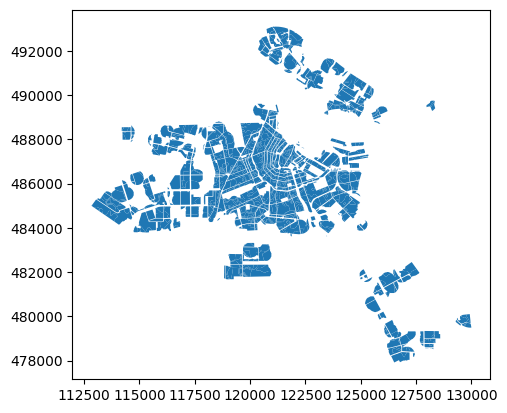

In [5]:
woningwaarde_2002.info()

woningwaarde_2002.plot()

In [6]:
w_queen = weights.Queen.from_dataframe(woningwaarde_2002, ids='geometry')

C:\Users\rmeij\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 330 disconnected components.
 There are 70 islands with ids: POLYGON Z ((114612.09613192 487874.99084048 0, 114619.84901128 487924.8608452 0, 114659.99999344001 487965.01184266 0, 114680.00000008 487965.01138078 0, 114700.00000672 487985.01178552 0, 114705.01176328001 487980.00000262004 0, 114705.00896608 487960.00000844005 0, 114620.00000680001 487874.9910201 0, 114612.09613192 487874.99084048 0)), POLYGON Z ((123021.7505128 484706.76241842005 0, 123099.99999832001 484785.01092052006 0, 123120.00000496 484785.0100994 0, 123140.0000116 484805.00983698 0, 123179.99999824 484805.00952906004 0, 123200.00000488 484825.00841986004 0, 123319.99999144001 484825.00693158 0, 123339.99999808 484805.00842568005 0, 123380.00001136001 484805.00675778004 0, 123

## Question 2: Calculating Moran’s I

Write a function calculate_morans_i that:

    Takes a spatial weight matrix W and an attribute array y.
    Calculates Moran’s I for the given attribute array.
    Returns the Moran’s I value and its p-value.

In [11]:
# Create the spatial weights matrix
W = weights.Queen.from_dataframe(woningwaarde_2002, ids='geometry')

C:\Users\rmeij\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 330 disconnected components.
 There are 70 islands with ids: POLYGON Z ((114612.09613192 487874.99084048 0, 114619.84901128 487924.8608452 0, 114659.99999344001 487965.01184266 0, 114680.00000008 487965.01138078 0, 114700.00000672 487985.01178552 0, 114705.01176328001 487980.00000262004 0, 114705.00896608 487960.00000844005 0, 114620.00000680001 487874.9910201 0, 114612.09613192 487874.99084048 0)), POLYGON Z ((123021.7505128 484706.76241842005 0, 123099.99999832001 484785.01092052006 0, 123120.00000496 484785.0100994 0, 123140.0000116 484805.00983698 0, 123179.99999824 484805.00952906004 0, 123200.00000488 484825.00841986004 0, 123319.99999144001 484825.00693158 0, 123339.99999808 484805.00842568005 0, 123380.00001136001 484805.00675778004 0, 123

In [12]:
# Assume 'housingvalue2019' is the Queen weights matrix and 'y' is your attribute array
y = woningwaarde_2002['Upper']  

In [13]:
def calculate_morans_i(W, y):

    # Ensure the attribute array is a numpy array
    y = np.array(y)
    
    # Create the Moran's I object
    mi = Moran(y, W)
    
    # Get the Moran's I value and the p-value
    morans_i_value = mi.I
    p_value = mi.p_sim
    
    return morans_i_value, p_value

In [14]:
# Calculate Moran's I and p-value
morans_i_value, p_value = calculate_morans_i(W,y)

('WARNING: ', <POLYGON Z ((114612.096 487874.991 0, 114619.849 487924.861 0, 114660 487965...>, ' is an island (no neighbors)')
('WARNING: ', <POLYGON Z ((123021.751 484706.762 0, 123100 484785.011 0, 123120 484785.01 ...>, ' is an island (no neighbors)')
('WARNING: ', <POLYGON Z ((114556.184 485059.914 0, 114560 485065.003 0, 114652.291 484972...>, ' is an island (no neighbors)')
('WARNING: ', <POLYGON Z ((125774.991 480020 0, 125774.991 480082.775 0, 125819.355 480106...>, ' is an island (no neighbors)')
('WARNING: ', <POLYGON Z ((126162.95 479949.275 0, 126111.175 479922.915 0, 126023.63 4799...>, ' is an island (no neighbors)')
('WARNING: ', <POLYGON Z ((124954.996 481960 0, 124974.996 481980 0, 124974.996 482000 0, ...>, ' is an island (no neighbors)')
('WARNING: ', <POLYGON Z ((124974.996 481737.157 0, 125064.16 481786.015 0, 125092.51 4817...>, ' is an island (no neighbors)')
('WARNING: ', <POLYGON Z ((125525.001 481774.338 0, 125525.001 481760 0, 125505.001 481740...>, ' is an 

In [15]:
# Print the results
print(f"Moran's I: {morans_i_value}, p-value: {p_value}")

Moran's I: 0.708854073600985, p-value: 0.001


## Question 3: Standardizing Spatial Weight Matrices

Create a function standardize_weights that:

    Takes a spatial weight matrix W.
    Standardizes it so that the weights of each row sum to one.
    Returns the standardized weight matrix.



In [16]:
def standardize_weight(W_standarized):
    W.transform = 'r'
    return W_standarized

# test 
W_standarized = standardize_weight(W)
print((W_standarized.sparse.sum(axis=1)).flatten())

[[1. 1. 1. ... 1. 1. 1.]]


## Question 4: Creating Distance-Based Weights

Write a function create_distance_weights that:

    Takes a set of point coordinates and a threshold distance.
    Constructs a distance-based spatial weight matrix where all points within the threshold distance are assigned a weight.
    Returns the weight matrix.


In [17]:
# function to make a distance-based weights matrix
def create_distance_weights(gdf, threshold):
    points = gdf.geometry.centroid
    coords = np.array([(point.x, point.y) for point in points])
    distance_band = DistanceBand(coords, threshold=threshold, binary=True)
    return distance_band

# load the data
gdf = gpd.read_file(woningwaarde_shp)

# set the threshold to 1km
threshold_distance = 1000
distance_weights = create_distance_weights(gdf, threshold_distance)


C:\Users\rmeij\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\libpysal\weights\util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  w = W(neighbors, weights, ids, **kwargs)
C:\Users\rmeij\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\libpysal\weights\distance.py:844: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  W.__init__(



## Question 5: Visualizing a Moran Plot

Using PySAL, write a function plot_moran that:

    Takes a spatial weights matrix W and an attribute array y.
    Creates and displays a Moran plot for the attribute.
    Saves the Moran plot as an image file.

Moran's I: 0.5269741461068418
P-value: 0.001


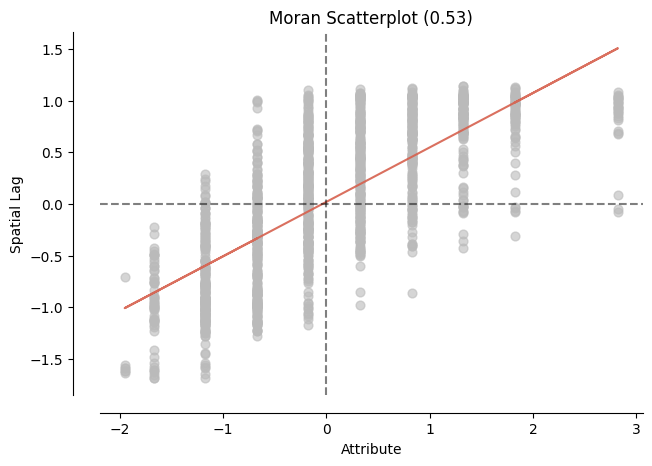

In [18]:
# function to plot morans 1
def plot_moran(w, y):
    moran = Moran(y, w)
    fig, ax = moran_scatterplot(moran)
    plt.savefig("moran_plot.png")           #save it to current directory
    return moran.I, moran.p_sim

attribute_data = gdf['Lower'].to_numpy()

# generate the plot
moran_i, moran_p = plot_moran(distance_weights, attribute_data)

print("Moran's I:", moran_i)
print("P-value:", moran_p)